In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from yahooquery import Ticker
import requests
import os
from GetStockDetail import *


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  10 of 10 completed


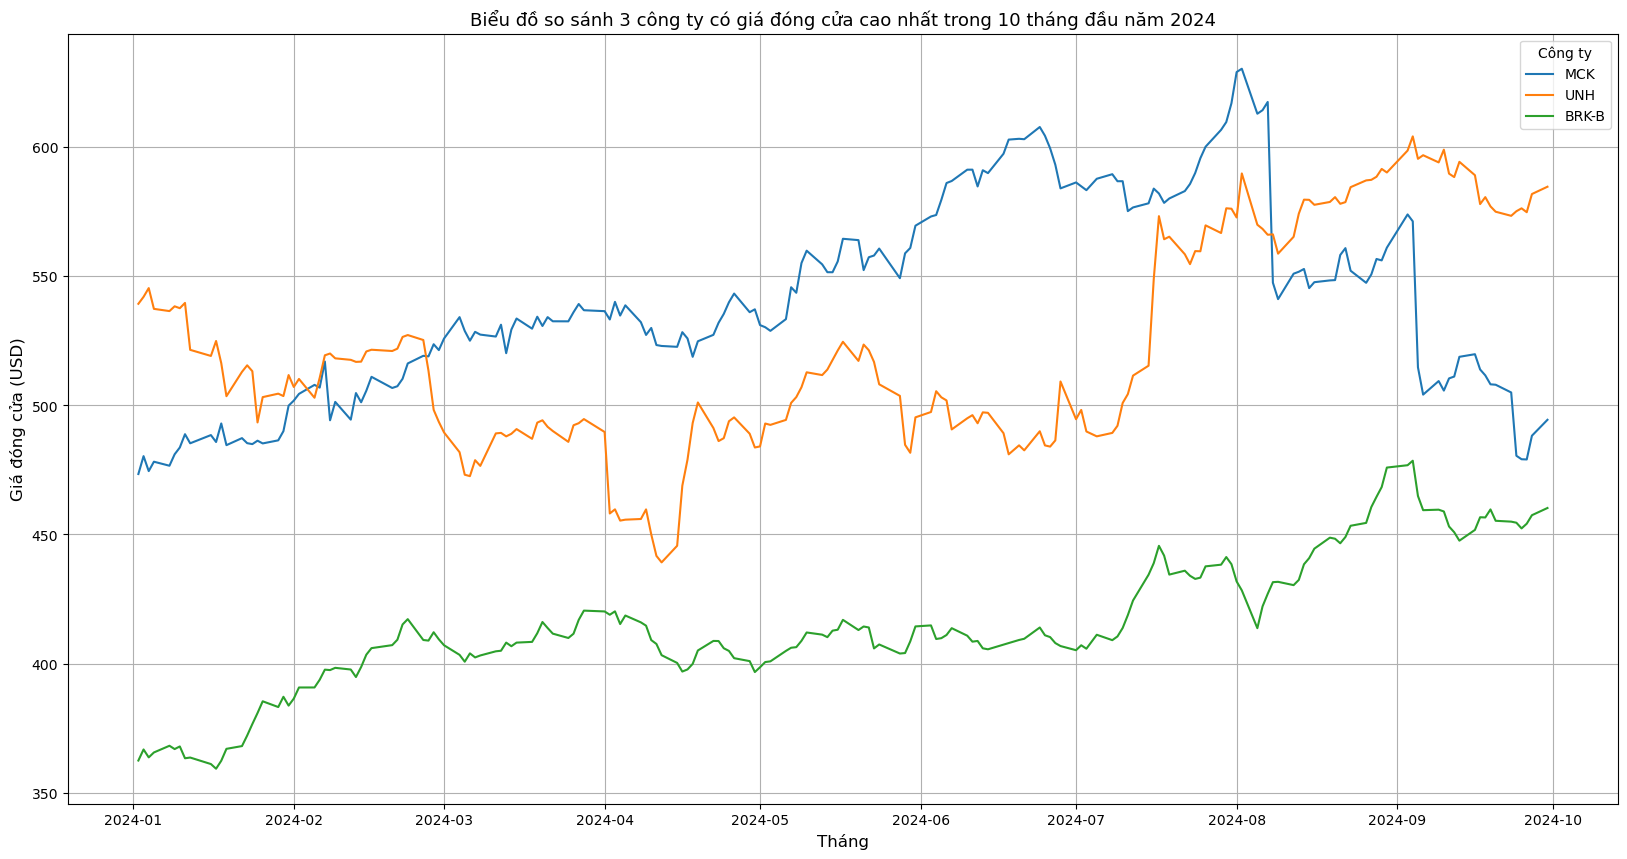

In [7]:
companies = get_stocks_names()
# Lấy ra giá đóng cửa trong 10 tháng đầu năm 2024
data_1 = yf.download(companies, start = "2024-01-01", end = "2024-10-01")["Close"]

#Tìm 3 công ty có giá đóng cửa cao nhất
average_closing_price = data_1.mean()
most_closing_price = average_closing_price.nlargest(3).index

# Lấy giá đóng cửa của 3 công ty
most_closing_price_data = data_1[most_closing_price]

# Vẽ biểu đồ
plt.figure(figsize = (20, 10))
for name in most_closing_price:
    plt.plot(most_closing_price_data.index, most_closing_price_data[name], label = name)
plt.title("Biểu đồ so sánh 3 công ty có giá đóng cửa cao nhất trong 10 tháng đầu năm 2024", fontsize = 13)
plt.xlabel("Tháng", fontsize = 12)
plt.ylabel("Giá đóng cửa (USD)", fontsize = 12)
plt.legend(title = "Công ty", fontsize = 10)
plt.grid(alpha = 1)
plt.show()

[*********************100%***********************]  10 of 10 completed


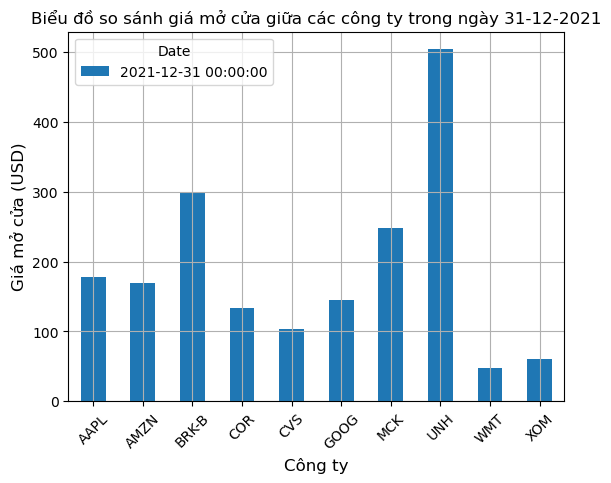

In [3]:
# Lấy dữ liệu giá cổ phiếu trong ngày 31-12-2021
data_2 = yf.download(companies, start = '2021-12-31', end = '2022-01-01')['Open']

# Vẽ biểu đồ
data_2.T.plot(kind = 'bar')
plt.title("Biểu đồ so sánh giá mở cửa giữa các công ty trong ngày 31-12-2021", fontsize = 12)
plt.xlabel("Công ty", fontsize = 12)
plt.ylabel("Giá mở cửa (USD)", fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(alpha = 1)
plt.show()

[*********************100%***********************]  10 of 10 completed


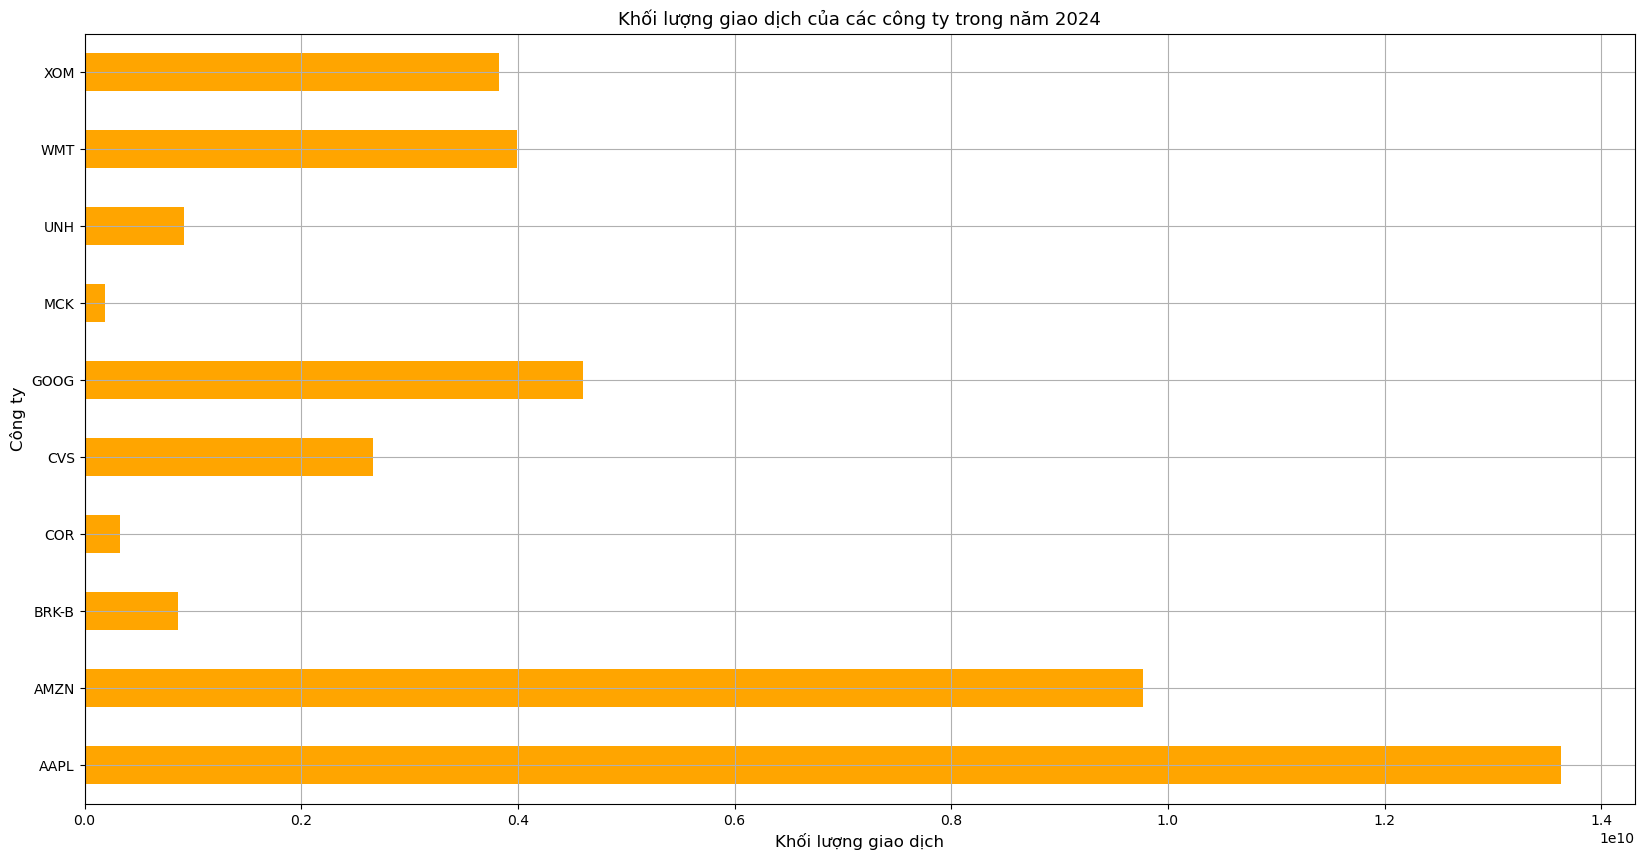

In [4]:
# Lấy ra khối lượng giao dịch của các công ty trong năm 2024
data_3 = yf.download(companies, start="2024-01-01", end="2024-12-31")['Volume']

# Tính tổng khối lượng giao dịch theo từng công ty
total_volume_2024 = data_3.sum()

# Vẽ biểu đồ
plt.figure(figsize = (20, 10))
total_volume_2024.plot(kind = 'barh', color = 'orange')
plt.title("Khối lượng giao dịch của các công ty trong năm 2024", fontsize = 13)
plt.xlabel("Khối lượng giao dịch", fontsize = 12)
plt.ylabel("Công ty", fontsize = 12)
plt.grid(True)
plt.show()

[*********************100%***********************]  10 of 10 completed


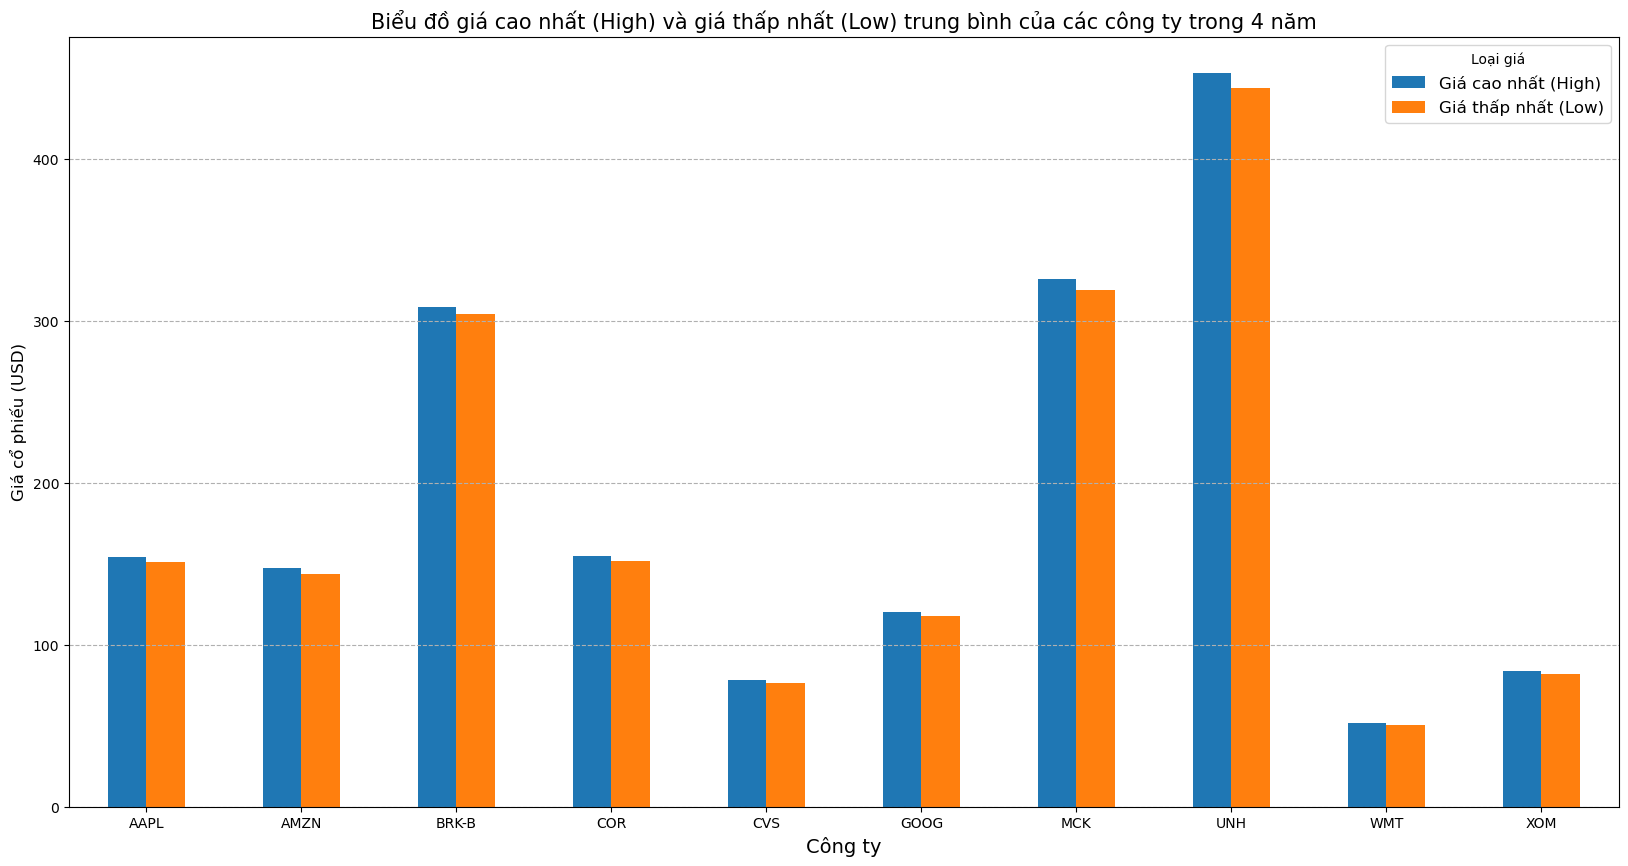

In [5]:
# Lấy dữ liệu cổ phiếu từ đầu năm 2020 đến cuối năm 2024
data_4 = yf.download(companies, start = "2020-01-01", end = "2024-12-31")

# Lấy giá trị cao nhất (High) và thấp nhất (Low)
high_price = data_4['High']
low_price = data_4['Low']

# Tính giá cao nhất và thấp nhất trung bình cho từng công ty
average_high_price = high_price.mean()
average_low_price = low_price.mean()
df = pd.DataFrame({
    'Giá cao nhất (High)': average_high_price,
    'Giá thấp nhất (Low)': average_low_price
})

# Vẽ biểu đồ
df.plot(kind='bar', figsize = (20, 10))
plt.title("Biểu đồ giá cao nhất (High) và giá thấp nhất (Low) trung bình của các công ty trong 4 năm", fontsize = 15)
plt.xlabel("Công ty", fontsize = 14)
plt.ylabel("Giá cổ phiếu (USD)", fontsize = 12)
plt.xticks(rotation = 0)
plt.legend(title = "Loại giá", fontsize = 12)
plt.grid(axis='y', linestyle='--', alpha = 1)
plt.show()

[*********************100%***********************]  10 of 10 completed


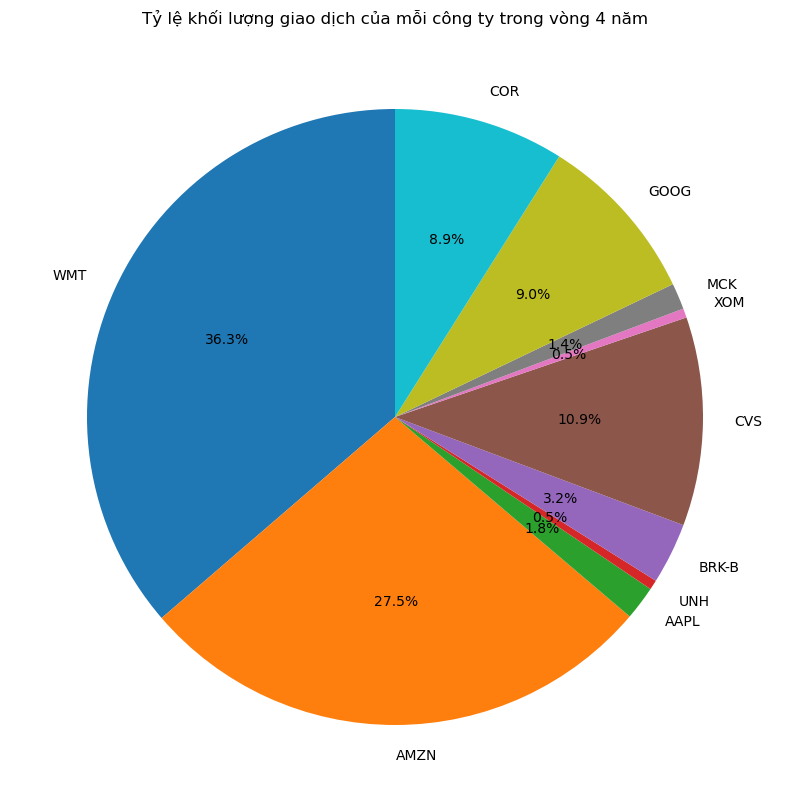

In [6]:
# Lấy ra khối lượng giao dịch từ đầu năm 2020 đến cuối năm 2024
data_5 = yf.download(companies, start = '2020-01-01', end = '2024-12-31')['Volume']

# Tính tổng khối lượng giao dịch
total_volume = data_5.sum()

# Vẽ biểu đồ tròn
plt.figure(figsize = (20, 10))
plt.pie(total_volume, labels = companies, autopct = '%1.1f%%', startangle = 90)
plt.title("Tỷ lệ khối lượng giao dịch của mỗi công ty trong vòng 4 năm")
plt.show()